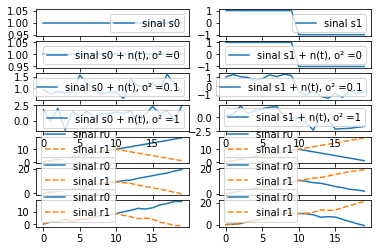

In [8]:
import numpy as np
import matplotlib.pyplot as plt


k = 20
l = np.arange(0,k,1)

#sinal antipodal
s0 = np.ones(k)                                  #sinal 1
s1 = np.hstack((s0[0:int(k/2)],-s0[int(k/2):k])) #sinal 2

#iniciando saida do correlator
r0 = np.zeros(k)
r1 = np.zeros(k)

#variancia
vtVar = [0,0.1,1]
plt.subplot(2*len(vtVar)+1, 2, 1)
plt.plot(l,s0)
plt.legend(['sinal s0'])
plt.subplot(2*len(vtVar)+1, 2, 2)
plt.plot(l,s1)
plt.legend(['sinal s1'])
## correlacao para s0
for i in range(len(vtVar)):
    vtNoise = np.sqrt(vtVar[i])*np.random.randn(k)

    rs0 = s0 + vtNoise                                  #sinal que chega no correlator ao enviar s0

    for n in range(k):
        r0[n] = np.sum(rs0[0:n]*s0[0:n])                #r0 quando foi enviado s0
        r1[n] = np.sum(rs0[0:n]*s1[0:n])                #r1 quando foi enviado s1
    plt.subplot(2*len(vtVar)+1, 2, 2*(i+1)+1)
    plt.plot(l,rs0)
    plt.legend(['sinal s0 + n(t), o² ='+str(vtVar[i])])
    plt.subplot(2*len(vtVar)+1, 2, 2*len(vtVar)+2+2*(i+1)-1)
    plt.plot(l,r0,l,r1,'--')
    plt.legend(['sinal r0', 'sinal r1'])
## correlacao para s1
for i in range(len(vtVar)):
    vtNoise = np.sqrt(vtVar[i])*np.random.randn(k)
    rs1 = s1 + vtNoise                                   #sinal que chega no correlator ao enviar s1
    for n in range(k):
        r0[n] = np.sum(rs1[0:n]*s0[0:n])                 #r0 quando foi enviado s1
        r1[n] = np.sum(rs1[0:n]*s1[0:n])                 #r1 quando foi enviado s1
    plt.subplot(2*len(vtVar)+1, 2, 2*(i+1)+2)
    plt.plot(l,rs1)
    plt.legend(['sinal s1 + n(t), o² ='+str(vtVar[i])])
    plt.subplot(2*len(vtVar)+1, 2,2*len(vtVar)+2+2*(i+1))
    plt.plot(l,r0,l,r1,'--')
    plt.legend(['sinal r0', 'sinal r1'])
plt.show()


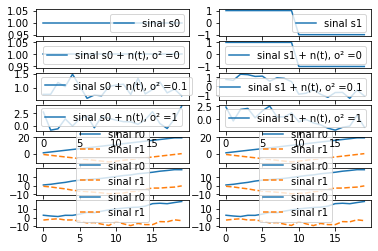

In [2]:
import numpy as np
import matplotlib.pyplot as plt


k = 20
l = np.arange(0,k,1)

#sinal antipodal
s0 = np.ones(k)                                  #sinal 1
rev0 = s0[:0:-1]                                  #sinal1 revertido
s1 = np.hstack((s0[0:int(k/2)],-s0[int(k/2):k])) #sinal 2
rev1 = s1[::-1]                                  #sinal2 revertido


#iniciando saida do correlator
r0 = np.zeros(k)
r1 = np.zeros(k)

#variancia
vtVar = [0,0.1,1]

#plotando S1 e S0
plt.subplot(2*len(vtVar)+1, 2, 1)
plt.plot(l,s0)
plt.legend(['sinal s0'])
plt.subplot(2*len(vtVar)+1, 2, 2)
plt.plot(l,s1)
plt.legend(['sinal s1'])


## filtro casado para s0
for i in range(len(vtVar)):
    vtNoise = np.sqrt(vtVar[i])*np.random.randn(k)

    rs0 = s0 + vtNoise                                  #sinal que chega no correlator ao enviar s0

    #filtro casado
    r0 = np.convolve(rs0,rev0)
    r0 = r0[0:k]
    r1 = np.convolve(rs0,rev1)
    r1 = r1[0:k]
    plt.subplot(2*len(vtVar)+1, 2, 2*(i+1)+1)
    plt.plot(l,rs0)
    plt.legend(['sinal s0 + n(t), o² ='+str(vtVar[i])])
    plt.subplot(2*len(vtVar)+1, 2, 2*len(vtVar)+2+2*(i+1)-1)
    plt.plot(l,r0,l,r1,'--')
    plt.legend(['sinal r0', 'sinal r1'])

## correlacao para s1
    vtNoise = np.sqrt(vtVar[i])*np.random.randn(k)
    rs1 = s1 + vtNoise                                   #sinal que chega no correlator ao enviar s1


        #filtro casado
    r0 = np.convolve(rs0,rev0)
    r0 = r0[0:k]
    r1 = np.convolve(rs0,rev1)
    r1 = r1[0:k]
    plt.subplot(2*len(vtVar)+1, 2, 2*(i+1)+2)
    plt.plot(l,rs1)
    plt.legend(['sinal s1 + n(t), o² ='+str(vtVar[i])])
    plt.subplot(2*len(vtVar)+1, 2,2*len(vtVar)+2+2*(i+1))
    plt.plot(l,r0,l,r1,'--')
    plt.legend(['sinal r0', 'sinal r1'])
plt.show()


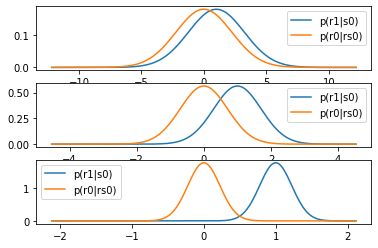

In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


Eb = 1
Er0 = Eb
Er1 = 0

vtEBN0_dB = np.array([-10,0,10])
vtEBN0 = 10**(vtEBN0_dB/10)
vtVar = Eb*Eb/vtEBN0/2

for i in range(len(vtEBN0_dB)):
    dstd = np.sqrt(vtVar[i])
    x = np.arange(-5*dstd-Eb,5*dstd+Eb,0.001)
    vtr0 = norm.pdf(x,Er0,dstd)
    vtr1 = norm.pdf(x,Er1,dstd)
    plt.subplot(len(vtVar),1,i+1)
    plt.plot(x,vtr0,x,vtr1)
    plt.legend(['p(r1|s0)','p(r0|rs0)'])
plt.show()


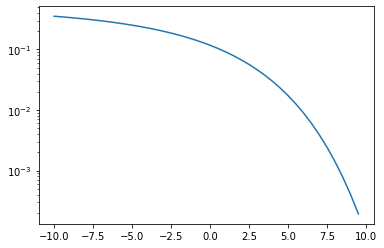

In [4]:
from scipy import special
import matplotlib.pyplot as plt
import numpy as np

vtEbN0_dB = np.arange(-10,10,0.5)
vtEbN0 = 10**(vtEbN0_dB/10)
vtPe = (1/2)*special.erfc(np.sqrt(vtEbN0/np.sqrt(2)))   
plt.semilogy(vtEbN0_dB,vtPe)
plt.show()


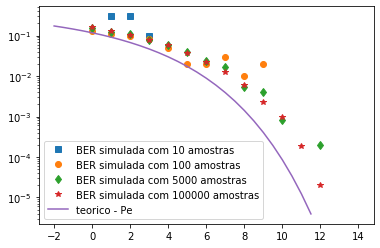

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special


def SiOrtogonal(Ebn0_dB,nMCSamples):
    #% Parâmetros de Entrada:
    #%
    #%  EbN0_dB: Eb/N0, considerando Eb = 1
    #%  nMCSamples: número de bits transmitidos para estimar a BER
    #%
    #% Saídas
    #%
    #%  dBER: BER estimada
    #%
    #% Essa função deve ser salva com o nome simOrtogonal.m na mesma pasta
    #% do arquivo h09.ipynb
    #%
    #% Exemplo de uso: [dBER] = simOrtogonal(10,1e5)
    dE = 1                                     #Energia do sinal s0 e s1
    dEbN0 = 10**(Ebn0_dB/10)
    dsgma = dE/np.sqrt(2*dEbN0)
    ## transmissao ##
    vtBin = np.random.randint(2,size=nMCSamples)
    vtIndex0 = []
    vtIndex1 = []
    for i in range(len(vtBin)):
        if vtBin[i] == 0:
            vtIndex0.append(i)
        else:
            vtIndex1.append(i)

    ##Recepção e detecção de erro
    # Gera saída do correlator para cada transmissão de s0
    vtro = np.zeros(len(vtBin))
    vtr1 = np.zeros(len(vtBin))
    vtro[vtIndex0] = dE + dsgma*np.random.randn(1,len(vtIndex0))
    vtr1[vtIndex0] = dsgma*np.random.randn(1,len(vtIndex0))
    # Gera saída do correlator para cada transmissão de s1
    vtro[vtIndex1] = dsgma*np.random.randn(1,len(vtIndex1))
    vtr1[vtIndex1] = dE + dsgma*np.random.randn(1,len(vtIndex1))
    vtBinDetec = 1*(vtro<vtr1)
    vtError = vtBin + vtBinDetec
    nErrors = 0
    for item in vtError:
        if item ==1:
            nErrors +=1

    return nErrors/nMCSamples

vtEbNoSim = np.arange(0,15,1)                  # Valores de Eb/No a serem simulados (dB)
vtEbNoTeo = np.arange(-1,15,0.1)               # Valores de Eb/No para a curva teórica (dB)
vtnMCSamples = [10,100,5000,100000]
vtSimError=np.zeros(len(vtEbNoSim))
vtMarkers = np.array(['s','o','d','*','<'])

vtEbN0_dB = np.arange(-2,12,0.5)
vtEbN0 = 10**(vtEbN0_dB/10)
vtPe = (1/2)*special.erfc(np.sqrt(vtEbN0/np.sqrt(2)))

for i in range(len(vtnMCSamples)):
    nMCSamples = vtnMCSamples[i]
    for ik in range(len(vtSimError)):
        vtSimError[ik] = SiOrtogonal( vtEbNoSim[ik], nMCSamples )
    plt.semilogy(vtEbNoSim,vtSimError,vtMarkers[i])
    #plt.semilogy(vtEbN0_dB,vtPe)
    #plt.show()
vtEbN0_dB = np.arange(-2,12,0.5)
vtEbN0 = 10**(vtEbN0_dB/10)
vtPe = (1/2)*special.erfc(np.sqrt(vtEbN0/np.sqrt(2)))
plt.semilogy(vtEbN0_dB,vtPe)
plt.legend(['BER simulada com 10 amostras','BER simulada com 100 amostras','BER simulada com 5000 amostras','BER simulada com 100000 amostras','teorico - Pe'])
plt.show()


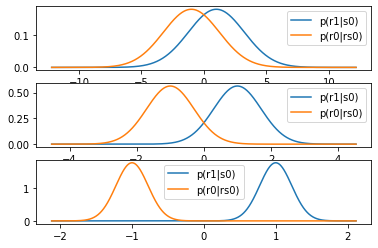

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Eb = 1
Er0 = Eb
Er1 = -Eb
vtEbN0_dB = np.array([-10,0,10])
vtEbN0 = 10**(vtEbN0_dB/10)
vtVar = Eb*Eb/vtEbN0/2
for ik in range(len(vtEbN0_dB)):
    dStd = np.sqrt(vtVar[ik])
    x=np.arange(-5*dStd-Eb,5*dStd+Eb,0.001)   ##eixo 5*variancia
    ## Cálculo da distribuicao Gaussiana
    rv1 = norm.pdf(x,Er0,dStd)
    rv2 = norm.pdf(x,Er1,dStd)
    plt.subplot(len(vtVar),1,ik+1)
    plt.plot(x,rv1,x,rv2)
    plt.legend(['p(r1|s0)','p(r0|rs0)'])
plt.show()


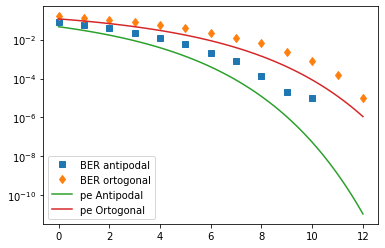

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special


def SiOrtogonal(Ebn0_dB,nMCSamples):
    #% Parâmetros de Entrada:
    #%
    #%  EbN0_dB: Eb/N0, considerando Eb = 1
    #%  nMCSamples: número de bits transmitidos para estimar a BER
    #%
    #% Saídas
    #%
    #%  dBER: BER estimada
    #%
    #% Essa função deve ser salva com o nome simOrtogonal.m na mesma pasta
    #% do arquivo h09.ipynb
    #%
    #% Exemplo de uso: [dBER] = simOrtogonal(10,1e5)
    dE = 1                                     #Energia do sinal s0 e s1
    dEbN0 = 10**(Ebn0_dB/10)
    dsgma = dE/np.sqrt(2*dEbN0)
    ## transmissao ##
    vtBin = np.random.randint(2,size=nMCSamples)
    vtIndex0 = []
    vtIndex1 = []
    for i in range(len(vtBin)):
        if vtBin[i] == 0:
            vtIndex0.append(i)
        else:
            vtIndex1.append(i)

    ##Recepção e detecção de erro
    # Gera saída do correlator para cada transmissão de s0
    vtro = np.zeros(len(vtBin))
    vtr1 = np.zeros(len(vtBin))
    vtro[vtIndex0] = dE + dsgma*np.random.randn(1,len(vtIndex0))
    vtr1[vtIndex0] = dsgma*np.random.randn(1,len(vtIndex0))
    # Gera saída do correlator para cada transmissão de s1
    vtro[vtIndex1] = dsgma*np.random.randn(1,len(vtIndex1))
    vtr1[vtIndex1] = dE + dsgma*np.random.randn(1,len(vtIndex1))
    vtBinDetec = 1*(vtro<vtr1)
    vtError = vtBin + vtBinDetec
    nErrors = 0
    for item in vtError:
        if item ==1:
            nErrors +=1

    return nErrors/nMCSamples

def SiAntipodal(EbN0_dB,nMCSamples):

    #Entrada:
    #%
    #%  EbN0_dB: Eb/N0, considerando Eb = 1
    #%  nMCSamples: número de bits transmitidos para estimar a BER
    #%
    #% Saídas
    #%
    #%  dBER: BER estimada
    #%
    #% Essa função deve ser salva com o nome simAntipodal.m na mesma pasta
    #% do arquivo h09.ipynb
    #%
    #% Exemplo de uso: [dBER] = simAntipodal(10,1e5);
    #% Parâmetros
    dE = 1
    dEbN0 = 10**(EbN0_dB/10)
    dsgma = dE/np.sqrt(2*dEbN0)
    ## transmissao
    #geracao dos numeros binario 0 e 1 com igual probabilidade
    vtBin = np.random.randint(2,size=nMCSamples)
    vtIndex0 = []
    vtIndex1 = []
    for i in range(len(vtBin)):
        if vtBin[i] == 0:
            vtIndex0.append(i)
        else:
            vtIndex1.append(i)
    vtr = np.zeros(len(vtBin))
    vtr[vtIndex0] = dE + dsgma*np.random.randn(1,len(vtIndex0))
    # Gera saída do correlator para cada transmissão de s1
    vtr[vtIndex1] = -dE + dsgma*np.random.randn(1,len(vtIndex1))
    vtBinDetec = 1*(vtr<0)
    vtError = vtBin + vtBinDetec
    nErrors = 0
    for item in vtError:
        if item ==1:
            nErrors +=1

    return nErrors/nMCSamples

nMCSamples = 100000
vtEbN0Sim_db = np.arange(0,13,1)
vtEbN0Teo_dB = np.arange(0,12.1,0.1)
vtEbN0Teo = 10**(vtEbN0Teo_dB/10)
vtSimErrorAnti = np.zeros(len(vtEbN0Sim_db))
vtSimErrorOrto = np.zeros(len(vtEbN0Sim_db))
for ik in range(len(vtEbN0Sim_db)):
    vtSimErrorAnti[ik]= SiAntipodal(vtEbN0Sim_db[ik], nMCSamples)
    vtSimErrorOrto[ik]= SiOrtogonal(vtEbN0Sim_db[ik], nMCSamples)

vtTeoErrorAnti = (1/2)*special.erfc(np.sqrt(2*vtEbN0Teo/np.sqrt(2)))
vtTeoErrorOrto = (1/2)*special.erfc(np.sqrt(vtEbN0Teo/np.sqrt(2)))
plt.semilogy(vtEbN0Sim_db,vtSimErrorAnti,'s',vtEbN0Sim_db,vtSimErrorOrto,'d')
plt.semilogy(vtEbN0Teo_dB,vtTeoErrorAnti,vtEbN0Teo_dB,vtTeoErrorOrto)
plt.legend(['BER antipodal','BER ortogonal','pe Antipodal','pe Ortogonal'])
plt.show()
